# Decision Trees

Decision Trees repetitively divides the data into sub parts by identifying lines.

<img src="https://miro.medium.com/max/870/1*xzF10JmR3K0rnZ8jtIHI_g.png">



Decision trees (basically upside-down trees) start at the top with the **root node**, from which everything starts from. 

- each **decision node** denotes a test on an attribute, _**has to have a yes/no answer**_ (ex commutes > 1 hour?)
- each **branch** line denotes the outcome of a test (yes/no)
- each **leaf node** holds a class label(ex accept offer? decline offer?)



## Important Parameters
- maximum depth
- minimum sample leafs

## Maximum Depth

Depth in a tree is the number of edges from the root node

<img src="https://i.stack.imgur.com/RHEqu.png">  

In most cases, you'll want to set a limit on the maximum depth to prevent from **overfitting**
Otherwise the questions may become very specific to the training data and not generalize well to data not seen!

## Minimum Sample Leafs

Similar to maximum depth main goal for setting this minimum is to prevent from overfitting.

If a leaf node from the training data contains only one sample, then the decisions that led to this leaf node may be specific to the training data and not generalizable.

# Random Forest

Decision trees are great, but may have a tendency to **overfit**. So perhaps several decision trees run in parrallel and then averaged together create a better classificaiton. This **ensemble** is known as a **random forest**.

<img src="https://raw.githubusercontent.com/bwsimedlytics/week1/master/pics/enshomble.JPG">

New input is run down all the trees and then combined by some method. The method may be treating each tree's result as a vote (and the most popular label wins), the ensemble method may average across the probabilities of the predictions, etc.

<img src="https://i0.wp.com/analyticsdefined.com/wp-content/uploads/2018/01/random-forests.png?fit=1965%2C942&ssl=1">

# Example Decision Tree

## Loading the Data

In [1]:
!pip install graphviz 
!apt-get install graphviz
!pip install -q graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
#imports
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

In [3]:
#loading pima indians diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#  'preg': number of pregnancies  
#  'plas': plasma glucose concentration 
#  'pres': blood pressure 
#  'skin': skin thickness
#  'test': Insulin
#  'mass': BMI
#  'pedi': diabetes pedigree function
#  'age': age
#  'class': '0' means does not have diabetes and '1' means has diabetes

data = po.read_csv(url, names=names)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Splitting Testing/Training Data

In [0]:
# columns we will use to make predictions with
x_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# column that we want to predict
y_col = 'class'

# 80-20 split of dataset
test_size = 0.2
x_training, x_testing, y_training, y_testing = train_test_split(data[x_cols], data[y_col], test_size=test_size, random_state=0)

## Creating Model

In [8]:
# creating a model w sklearn's decision DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=5)  # minimum sample leafs is the minimum sample amount the leaf can have

# training/fitting the model with training data
decision_tree.fit(x_training, y_training)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Evaluating Model

In [9]:
#printing accuracy of testing & training data
y_train_pred= decision_tree.predict(x_training)
print("Training Accuracy is ", accuracy_score(y_training, y_train_pred)*100)
y_test_pred= decision_tree.predict(x_testing)
print("Testing Accuracy is ", accuracy_score(y_testing,y_test_pred)*100)

Training Accuracy is  80.45602605863192
Testing Accuracy is  74.02597402597402


## Using graphviz to view Decision Tree Graph

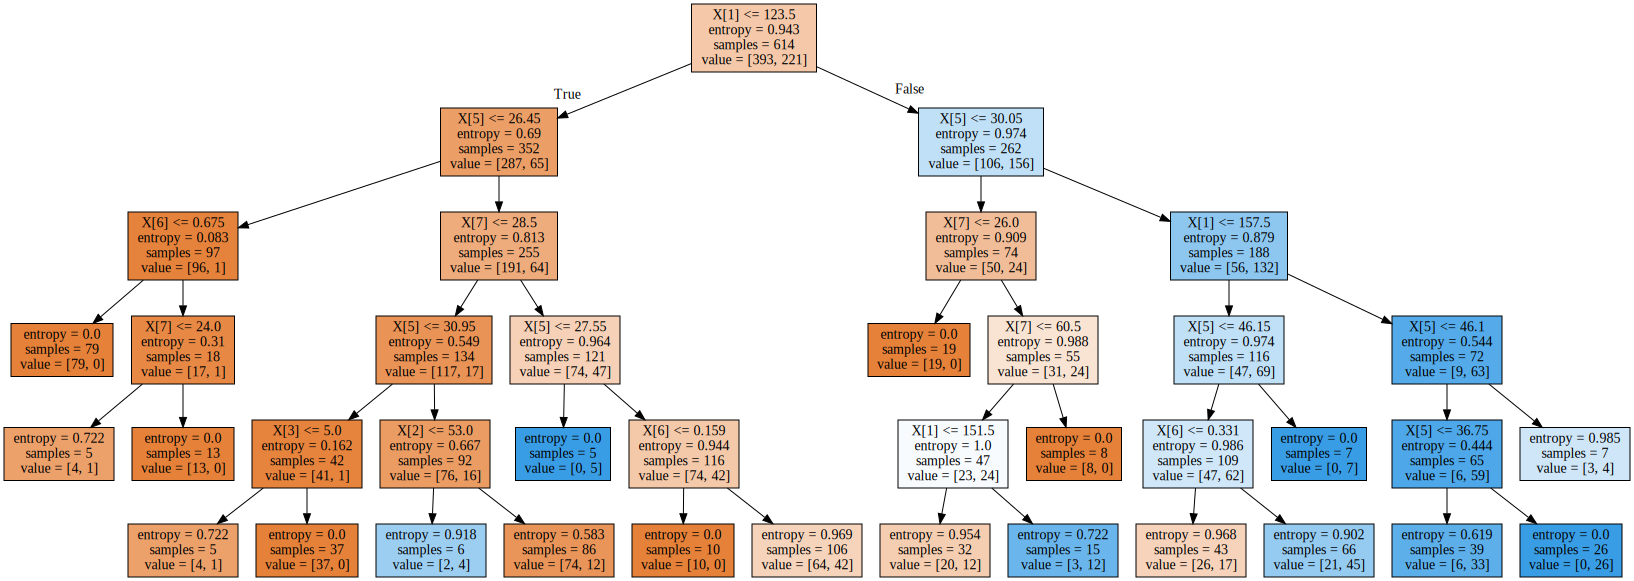

In [14]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

# Example Random Forest

## Creating the Model

In [15]:
# creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# training/fitting the model with training data
random_forest.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluating the Model

In [16]:
#printing accuracy of testing & training data
y_train_pred= random_forest.predict(x_training)
print("Training Accuracy is ", accuracy_score(y_training, y_train_pred)*100)
y_test_pred= random_forest.predict(x_testing)
print("Testing Accuracy is ", accuracy_score(y_testing,y_test_pred)*100)

Training Accuracy is  100.0
Testing Accuracy is  77.27272727272727


# Notes

<img src="https://raw.githubusercontent.com/bwsimedlytics/week1/master/pics/tree.PNG">

**Advantages**
- Easy to understand and interpret, perfect for visual representation. 
- Can work with numerical and categorical features.

**Disadvantages**
- Tends to overfit